### 1. Detect corner of an image 

  - **Corners**
    - Locations that have large intensity changes in more than one directions.
    - Are at the intersection of two edges.
    - They are the most repeatable features
    - Easy to recognize given two or more images have the same scene.

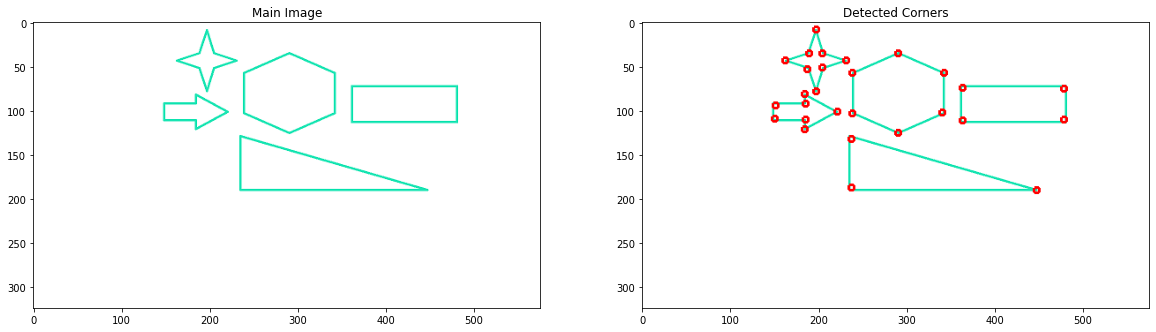

In [35]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
   
# read the image 
img = cv2.imread('Images/corner1.png') 
  
# convert image to gray scale image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# detect corners with the goodFeaturesToTrack function. 
# corners = cv.goodFeaturesToTrack(image, maxCorners, qualityLevel,
#                                  minDistance, corners, mask, blockSize,
#                                  useHarrisDetector)
'''
mask: region of interest.
      If the image is not empty (it needs to have the type CV_8UC1 and the same size as image ),
      it specifies the region in which the corners are detected.
blockSize : Size of an average block for computing a derivative covariation matrix over each pixel neighborhood.
useHarrisDetector: Parameter indicating whether to use a Harris detector (see cornerHarris) or cornerMinEigenVal.
k : Free parameter of the Harris detector.
'''
corners = cv2.goodFeaturesToTrack(gray, 28, 0.01, 10) 
# int0: used for converting bounding box floating point values to int in OpenCV problems.
corners = np.int0(corners) 
  
# we iterate through each corner,  
# making a circle at each point that we think is a corner. 
img_copy = np.copy(img)
for i in corners: 
    # np.ravel(array, order = ‘C’)
    # returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
    x, y = i.ravel() 
    cv2.circle(img_copy, (x, y), 3, 255, 2) 
    
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
ax1.set_title('Main Image')
ax1.imshow(img)
ax2.set_title('Detected Corners')
ax2.imshow(img_copy)

### 2. Real-Time Edge Detection

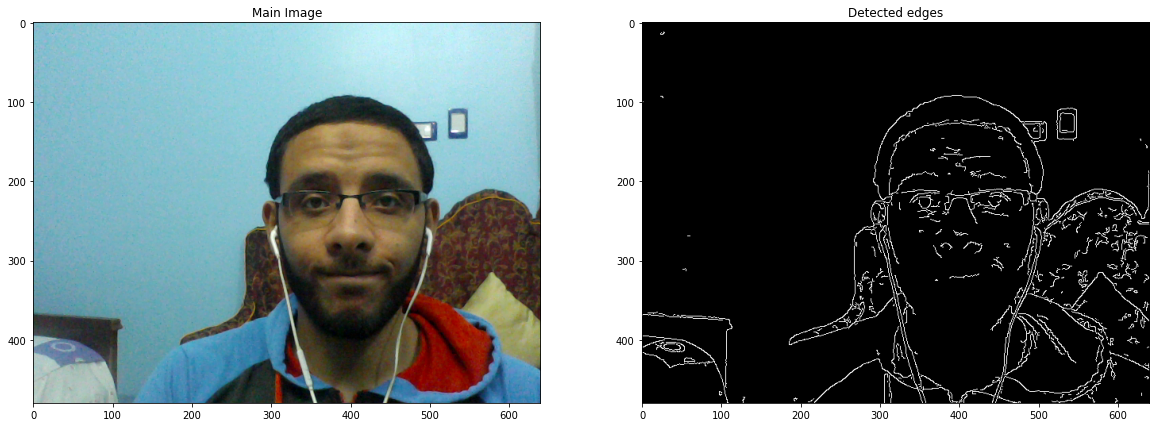

In [19]:
import cv2  
import numpy as np 
import matplotlib.pyplot as plt 
    
# capture frames from a camera 
cap = cv2.VideoCapture(0) 
  
# loop runs if capturing has been initialized 
while(1): 
  
    # reads frames from a camera 
    ret, frame = cap.read() 
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
  
    edges = cv2.Canny(frame,100,200) 
  
    # Display edges in a frame 
    cv2.imshow('Edges',edges) 
  
    # Wait for Esc key to stop 
    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break
    
# Close the window 
cap.release() 
  
# De-allocate any associated memory usage 
cv2.destroyAllWindows() 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
ax1.set_title('Main Image')
ax1.imshow(frame_rgb)
ax2.set_title('Detected edges')
ax2.imshow(edges, cmap='gray')

### 3. Corner detection with Harris Corner Detection method

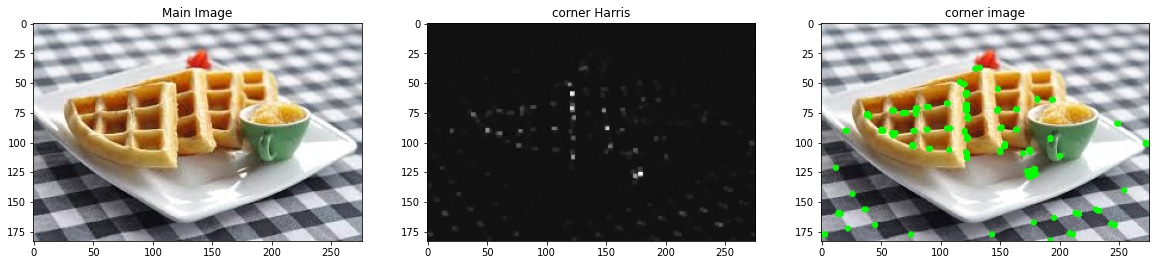

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('Images/waffle.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
# cv2.cornerHarris(src, dest, blockSize, kSize, freeParameter, borderType)
# freeParameter --> determine which point are consider corner
'''
src : Input single-channel 8-bit or floating-point image.
dst : Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
blockSize : Neighborhood size.
ksize : Aperture parameter for the Sobel operator.
k : Harris detector free parameter. 
borderType : Pixel extrapolation method.
'''
# R = det(M) - k(trace(M))^2
# R = λ1 λ2  -  k (λ1 + λ2)^2
dst = cv2.cornerHarris(gray, 2, 3, 0.02)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)


# Define a threshold for extracting strong corner
# this value may vary depending on the image 
# dst.max() --> return maximum corner detection value
thresh = 0.1 * dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,20))
ax1.set_title('Main Image')
ax1.imshow(image_copy)
ax2.set_title('corner Harris')
ax2.imshow(dst, cmap='gray')
ax3.set_title('corner image')
ax3.imshow(corner_image)

### 4. Corner Detection with Shi-Tomasi Corner Detection

  - R = min(λ1,λ2)

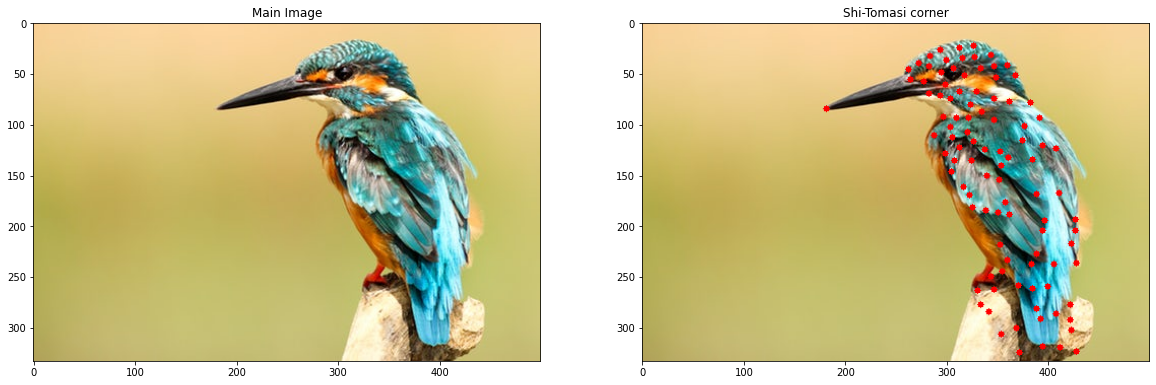

In [37]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
  
# path to input image specified and   
# image is loaded with imread command 
img = cv2.imread('Images/bird.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  
# convert image to grayscale 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Shi-Tomasi corner detection function 
# We are detecting only 100 best corners here 
# cv2.goodFeaturesToTrack(gray_img, max-corners, Quality-level , Minmum-distance, blockSize, useHarrisDetector)
corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10) 
  
# convert corners values to integer 
# So that we will be able to draw circles on them 
corners = np.int0(corners) 

img_copy = np.copy(img_rgb)
# draw red color circles on all corners 
for i in corners: 
    # np.ravel(array, order = ‘C’)
    # returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
    x, y = i.ravel() 
    # cv2.circle(image, center pt, radius, color, thickness)
    cv2.circle(img_copy, (x, y), 3, (255, 0, 0), -1) 
    
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
ax1.set_title('Main Image')
ax1.imshow(img_rgb)
ax2.set_title('Shi-Tomasi corner')
ax2.imshow(img_copy)    